In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering as AC
sns.set(style="darkgrid")

In [10]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.tsv", sep="\t", usecols=['Latitude', 'Longitude', 'OFNS_DESC'])

In [11]:
loc_to_change  = list(df['OFNS_DESC'].value_counts()[20:].index)
df.loc[df['OFNS_DESC'].isin(loc_to_change) , df.columns=='OFNS_DESC'] = 'OTHER'
df['OFNS_DESC'] = pd.Categorical(df['OFNS_DESC'])
df.dropna(inplace=True)

In [12]:
#Remove any data outside NYC (latitude, longitude) range
df.iloc[(df[['Longitude']].values < -74.5).flatten(), df.columns=='Longitude'] = 0.0
df.iloc[(df[['Longitude']].values > -73.5).flatten(), df.columns=='Longitude'] = 0.0
df.iloc[(df[['Latitude']].values < 40.4).flatten(),  df.columns=='Latitude'] = 0.0
df.iloc[(df[['Latitude']].values > 50).flatten(),  df.columns=='Latitude'] = 0.0
df.replace({'Latitude': 0.0, 'Longitude': 0.0}, np.nan, inplace=True)
df.dropna(inplace=True)

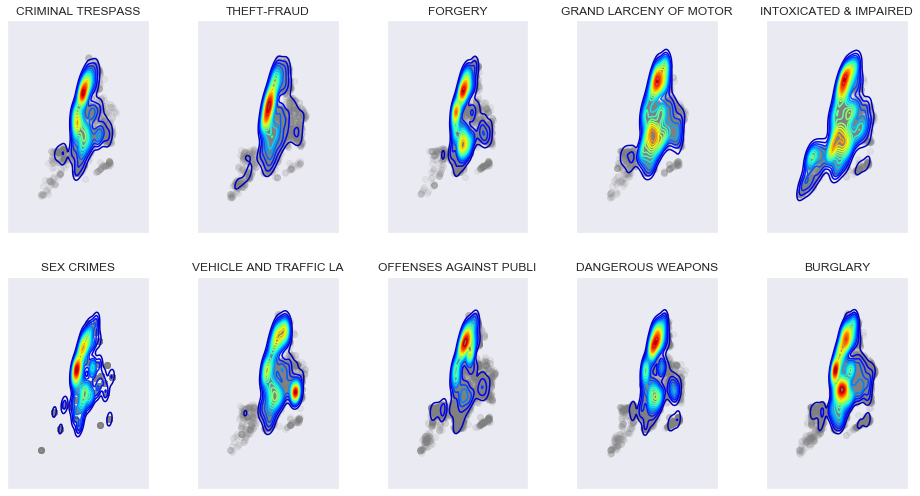

In [30]:
#Plot geographic hotspots for top 10 offense types
occ_desc = list(df.groupby(df.OFNS_DESC).size().sort_values(ascending=True).index)[:10]
occ_desc = np.array(occ_desc).reshape(2,5)
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(13,7))
for i in range(2):
    for j in range(5):
        df_new = df[(df['OFNS_DESC'] == occ_desc[i,j])]
        sns.regplot('Longitude', 'Latitude', data= df_new[['Longitude','Latitude']], fit_reg=False, scatter_kws={'alpha':.1, 'color':'grey'}, ax=ax[i,j])
        sns.kdeplot(df_new['Longitude'],df_new['Latitude'], cmap="jet", bw='scott', n_levels=20, cbar=False, shade=False, shade_lowest=False,ax=ax[i,j])
        ax[i,j].set_title(str(occ_desc[i,j])[:22]); ax[i,j].set_ylabel(''); ax[i,j].set_xlabel('')
        ax[i,j].set_xticks([]); ax[i,j].set_yticks([])
fig.tight_layout(h_pad=3)
plt.show()

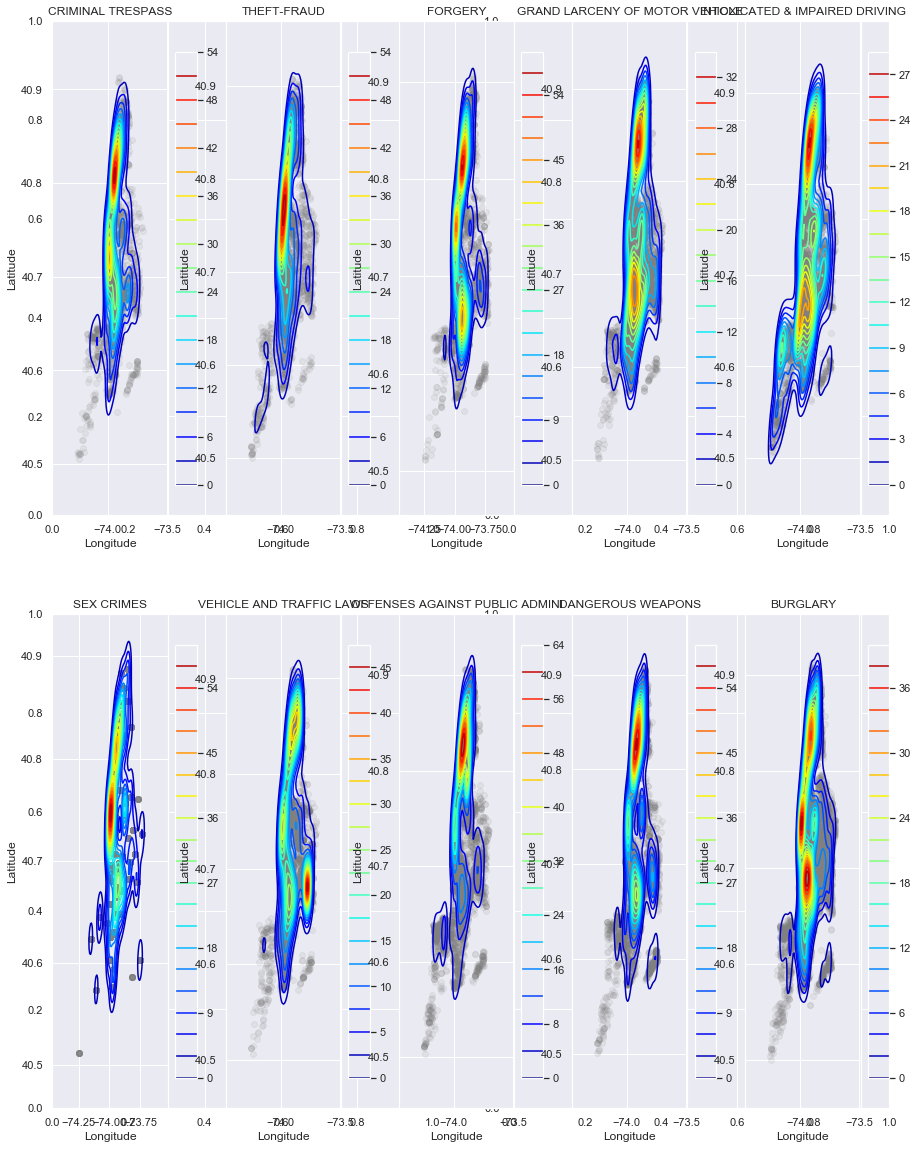

In [10]:
occ_desc = list(df.groupby(df.OFNS_DESC).size().sort_values(ascending=True).index)[:10]
occ_desc = np.array(occ_desc).reshape(2,5)
fig, ax = plt.subplots(2, 5, sharey='row', figsize=(15,20))
for i, crime_type in enumerate(ctypes):
    df_new = df[(df['OFNS_DESC'] == crime_type)]
    ax = fig.add_subplot(int(np.ceil(float(len(ctypes)) / 5)), 5, i+1)
    sns.regplot('Longitude', 'Latitude',
               data= df_new[['Longitude','Latitude']],
               fit_reg=False,
               scatter_kws={'alpha':.1, 'color':'grey'},
               ax=ax)
    sns.kdeplot(df_new['Longitude'],df_new['Latitude'],
                 cmap="jet", 
                 bw='scott',
                 n_levels=20,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False,
                 ax=ax)
    ax.set_title(crime_type)
#ax.set_xlim(-87.9,-87.5)
#ax.set_ylim(41.60,42.05)